In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from smt22.utils import preprocess, valid_input
from v9.Data.DataGeneratorsTransformer import CombinedGenerator

sns.set_style()


In [2]:
# Inputs
fp_music = "./v9/Data/lessfiles"  # Shorter path than Python files

# Params
rhythm_context_size = 4
melody_context_size = 4

In [3]:
# Generate data
combined_generator = CombinedGenerator(fp_music, save_conversion_params=False, to_list=False, meta_prep_f=None)

In [4]:
# Counter of num_pieces
num_pieces = combined_generator.get_num_pieces()
for k, v in Counter(num_pieces).items():
    print(f"{v} songs with {k} instruments")

# Product of num_pieces
print(f"Total number of tracks: {sum([k * v for k, v in Counter(num_pieces).items()])}")

data_iter = combined_generator.generate_data(rhythm_context_size=rhythm_context_size,
                                             melody_context_size=melody_context_size)


115 songs with 4 instruments
10 songs with 5 instruments
172 songs with 1 instruments
2 songs with 7 instruments
1 songs with 6 instruments
Total number of tracks: 702


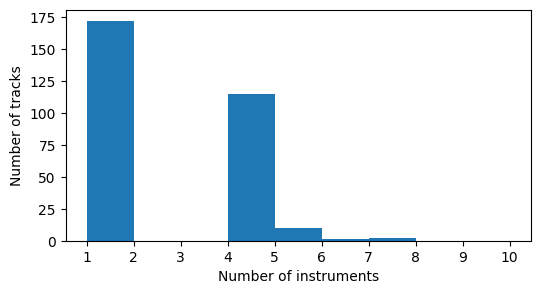

In [5]:
# Plot the distribution of the number of instruments in each track
plt.figure(figsize=(6, 3))
plt.hist(num_pieces, bins=range(1, 11))
plt.xticks(range(1, 11))
plt.xlabel("Number of instruments")
plt.ylabel("Number of tracks")
plt.show()


In [6]:
count_incorrect_shape = 0
count_training_size = 0
count_tracks = 0

ys_rhythm, ys_melody = [], []
X1, X2, X3, X4, X5 = [], [], [], [], []
for X, y in data_iter:
    X, y_rhythm, y_melody = preprocess(X, y)  # Preprocess a single track
    count_tracks += 1

    if not valid_input(X, y_rhythm, y_melody):
        count_incorrect_shape += 1
        continue

    context_rhythms, context_melodies, meta, lead_rhythm, lead_melody = X
    for row in range(context_rhythms.shape[0]):
        count_training_size += 1

        X1.append(context_rhythms[row])
        X2.append(context_melodies[row])
        X3.append(meta[row])
        X4.append(lead_rhythm[row])
        X5.append(lead_melody[row])

        ys_rhythm.append(y_rhythm[row])
        ys_melody.append(y_melody[row])

print(f"Total number of tracks: {count_tracks}")
print(f"Total number of incorrect tracks: {count_incorrect_shape} ({count_incorrect_shape / count_tracks * 100:.2f}%)")
print(f"Total number of training examples: {count_training_size}")


Total number of tracks: 702
Total number of incorrect tracks: 153 (21.79%)
Total number of training examples: 9337


In [7]:
# Convert all to np arrays  
X1, X2, X3, X4, X5 = np.array(X1), np.array(X2), np.array(X3), np.array(X4), np.array(X5)
ys_rhythm, ys_melody = np.array(ys_rhythm), np.array(ys_melody)

# Shapes
print(f"X1 shape: {X1.shape}; X2 shape: {X2.shape}; X3 shape: {X3.shape}; X4 shape: {X4.shape}; X5 shape: {X5.shape}")
print(f"ys_rhythm shape: {ys_rhythm.shape}; ys_melody shape: {ys_melody.shape}")

X1 shape: (9337, 16); X2 shape: (9337, 192); X3 shape: (9337, 7); X4 shape: (9337, 4); X5 shape: (9337, 48)
ys_rhythm shape: (9337, 127, 4); ys_melody shape: (9337, 25, 48)


In [8]:
# Print min-max of each feature
print(f"X1 min: {np.min(X1)}; X1 max: {np.max(X1)}")
print(f"X2 min: {np.min(X2)}; X2 max: {np.max(X2)}")
print(f"X3 min: {np.min(X3)}; X3 max: {np.max(X3)}")
print(f"X4 min: {np.min(X4)}; X4 max: {np.max(X4)}")
print(f"X5 min: {np.min(X5)}; X5 max: {np.max(X5)}")

# Print min-max of each label
print(f"ys_rhythm min: {np.min(ys_rhythm)}; ys_rhythm max: {np.max(ys_rhythm)}")
print(f"ys_melody min: {np.min(ys_melody)}; ys_melody max: {np.max(ys_melody)}")


X1 min: 9.0; X1 max: 122.0
X2 min: 0.0; X2 max: 24.0
X3 min: -0.25; X3 max: 0.9916666746139526
X4 min: 9.0; X4 max: 122.0
X5 min: 1.0; X5 max: 24.0
ys_rhythm min: 0.0; ys_rhythm max: 1.0
ys_melody min: 0.0; ys_melody max: 1.0


In [25]:
print(f"No. of unique values in Rhythm Context: {np.unique(X1).size}")
print(f"No. of unique values in Melody Context: {np.unique(X2).size}")
print(f"No. of unique values in Meta: {np.unique(X3).size}")
print(f"No. of unique values in Lead Rhythm: {np.unique(X4).size}")
print(f"No. of unique values in Lead Melody: {np.unique(X5).size}")

print()

print(f"Top 5 key-value pairs in Rhythm Context: {Counter(X1.flatten()).most_common(5)}")
print(f"Top 5 key-value pairs in Melody Context: {Counter(X2.flatten()).most_common(5)}")
print(f"Top 5 key-value pairs in Meta: {Counter(X3.flatten()).most_common(5)}")
print(f"Top 5 key-value pairs in Lead Rhythm: {Counter(X4.flatten()).most_common(5)}")
print(f"Top 5 key-value pairs in Lead Melody: {Counter(X5.flatten()).most_common(5)}")


No. of unique values in Rhythm Context: 16
No. of unique values in Melody Context: 17
No. of unique values in Meta: 3594
No. of unique values in Lead Rhythm: 16
No. of unique values in Lead Melody: 16

Top 5 key-value pairs in Rhythm Context: [(84.0, 74947), (26.0, 33256), (16.0, 29307), (83.0, 3773), (33.0, 2697)]
Top 5 key-value pairs in Melody Context: [(0.0, 263520), (8.0, 240690), (1.0, 240423), (3.0, 202048), (6.0, 172644)]
Top 5 key-value pairs in Meta: [(0.0, 9319), (-0.25, 9297), (0.37931034, 1605), (0.20689656, 1468), (0.125, 1381)]
Top 5 key-value pairs in Lead Rhythm: [(84.0, 21829), (16.0, 8307), (26.0, 3863), (83.0, 1140), (33.0, 753)]
Top 5 key-value pairs in Lead Melody: [(1.0, 71362), (8.0, 70077), (3.0, 58190), (6.0, 49302), (5.0, 46462)]


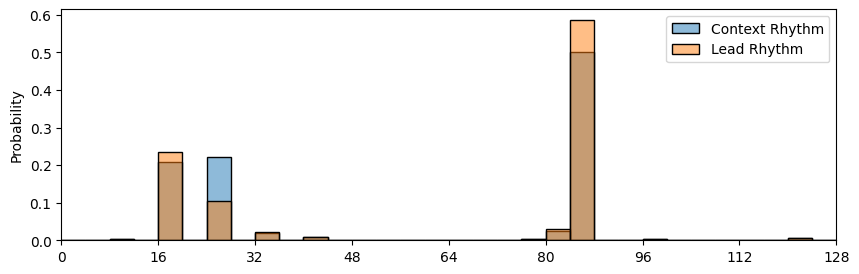

In [10]:
# Overlapping distribution of X1 and X4
plt.figure(figsize=(10, 3))
sns.histplot(X1.flatten(), bins=32, binrange=(0, 128), label="Context Rhythm", alpha=0.5, stat="probability")
sns.histplot(X4.flatten(), bins=32, binrange=(0, 128), label="Lead Rhythm", alpha=0.5, stat="probability")

# Show only one legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Log scale
plt.xticks(range(0, 129, 16))
plt.xlim(0, 128)
plt.show()

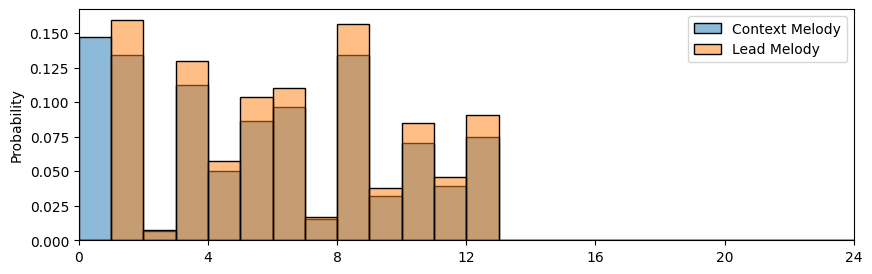

In [11]:
# Overlapping distribution of X2 and X5
plt.figure(figsize=(10, 3))
sns.histplot(X2.flatten(), bins=24, binrange=(0, 24), label="Context Melody", alpha=0.5, stat="probability")
sns.histplot(X5.flatten(), bins=24, binrange=(0, 24), label="Lead Melody", alpha=0.5, stat="probability")

# Show only one legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xticks(range(0, 25, 4))
plt.xlim(0, 24)
plt.show()


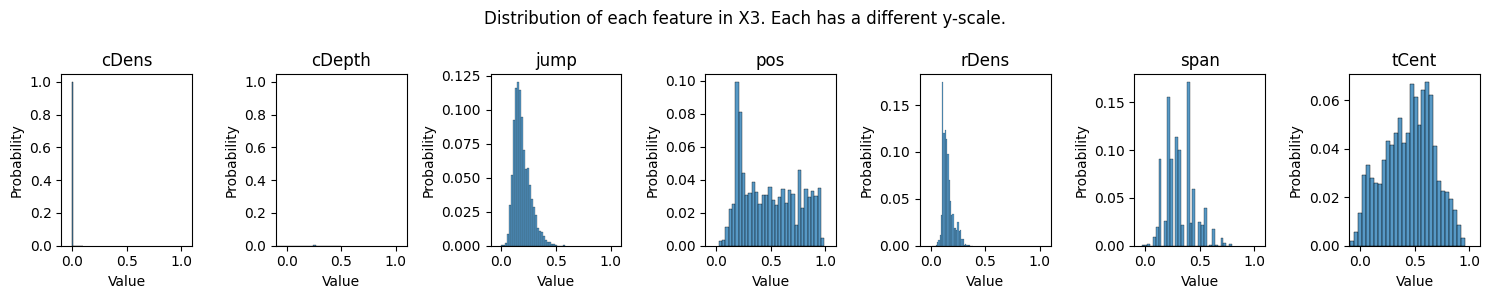

In [12]:
# Distribution of each feature in X3
# Features are all normalized to [0, 1]

features = ['cDens', 'cDepth', 'jump', 'pos', 'rDens', 'span', 'tCent']
fig, axis = plt.subplots(1, 7, figsize=(15, 3), sharex=True)
for i in range(7):
    sns.histplot(X3[:, i], bins=32, ax=axis[i], stat="probability")
    axis[i].set_title(f"{features[i]}")
    axis[i].set_xlabel("Value")
    axis[i].set_ylabel("Probability")
    axis[i].set_xlim(-0.1, 1.1)

plt.suptitle("Distribution of each feature in X3. Each has a different y-scale.")
plt.tight_layout()
plt.show()

In [13]:
print(f"Unique values in ys_rhythm: {np.unique(ys_rhythm)}")
print(f"Unique values in ys_melody: {np.unique(ys_melody)}")

print(f"Frequency of each value in ys_rhythm: {Counter(ys_rhythm.flatten())}")
print(f"Frequency of each value in ys_melody: {Counter(ys_melody.flatten())}")

Unique values in ys_rhythm: [0. 1.]
Unique values in ys_melody: [0. 1.]
Frequency of each value in ys_rhythm: Counter({0.0: 4705848, 1.0: 37348})
Frequency of each value in ys_melody: Counter({0.0: 10756224, 1.0: 448176})


In [14]:
# Row-wise sum of ys_rhythm
row_sums_rhythm = ys_rhythm.sum(axis=1)
print(f"Row-wise sum of ys_rhythm: {row_sums_rhythm}")

np.unique(row_sums_rhythm)

row_sums_melody = ys_melody.sum(axis=1)
print(f"Row-wise sum of ys_melody: {row_sums_melody}")

np.unique(row_sums_melody)

print("All rows have one activation, thus is one-hot encoded")


Row-wise sum of ys_rhythm: [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 ...
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Row-wise sum of ys_melody: [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
All rows have one activation, thus is one-hot encoded


In [15]:
# Number of elements in each label
print(f"Number of elements in ys_rhythm: {ys_rhythm.size:_}")
print(f"Number of elements in ys_melody: {ys_melody.size:_}")

print(f"One activation for rhythm each bar: {(ys_rhythm.shape[0] * ys_rhythm.shape[2]) == row_sums_rhythm.sum()}")
print(f"One activation for melody each bar: {(ys_melody.shape[0] * ys_melody.shape[2]) == row_sums_melody.sum()}")
print("All rows have one activation, thus is one-hot encoded")


Number of elements in ys_rhythm: 4_743_196
Number of elements in ys_melody: 11_204_400
One activation for rhythm each bar: True
One activation for melody each bar: True
All rows have one activation, thus is one-hot encoded


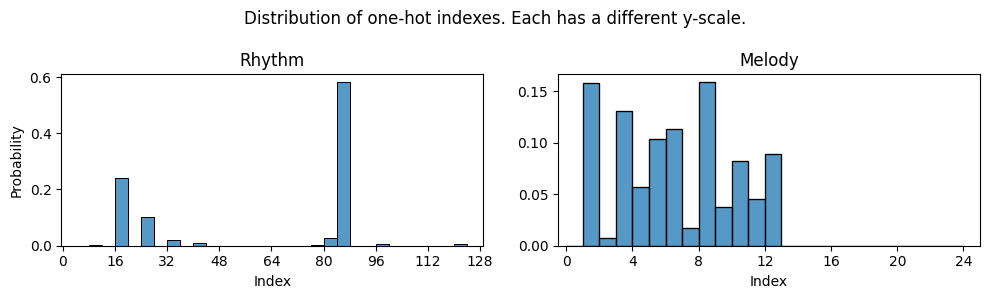

In [16]:
# Plot distribution of one-hot indexes

fig, axis = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(np.argmax(ys_rhythm, axis=1).flatten(), bins=32, binrange=(0, 128), ax=axis[0], stat="probability")
axis[0].set_title("Rhythm")
axis[0].set_xlabel("Index")
axis[0].set_ylabel("Probability")
axis[0].set_xticks(range(0, 129, 16))
axis[0].set_xlim(-0.5, 129)

sns.histplot(np.argmax(ys_melody, axis=1).flatten(), bins=24, binrange=(0, 24), ax=axis[1], stat="probability")
axis[1].set_title("Melody")
axis[1].set_xlabel("Index")
axis[1].set_ylabel("")
axis[1].set_xticks(range(0, 25, 4))
axis[1].set_xlim(-0.5, 25)

plt.suptitle("Distribution of one-hot indexes. Each has a different y-scale.")
plt.tight_layout()
plt.show()